In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.optimizers import RMSprop
import joblib
%matplotlib inline

In [71]:
data=pd.read_csv("./Datasets/train.csv")
data_sub= pd.read_csv("./Datasets/test.csv")

In [74]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
data_sub.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
data.isnull().describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000


In [8]:
def plotMe(dig, label=None):
    if len(dig.shape)==1:
        dig=dig.reshape(28,28)
    plt.imshow(dig,cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(label)

In [9]:
def plotSamples(data):
    plt.figure(figsize=(10,7))
    plt.title("Samples")
    fig=1
    for i in range(data.values.shape[0]):
        if i%10000==0:
            plt.subplot(2,3,fig)
            if data.shape[1]==785:
                plotMe(data.iloc[i,1:].values,str(data.iloc[i,0]))
            else:
                plotMe(data.iloc[i,:].values,)
            fig=fig+1
    plt.show()

Training Data:


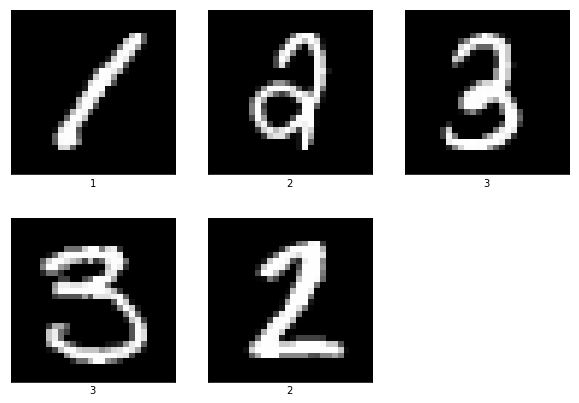

Submission Data:


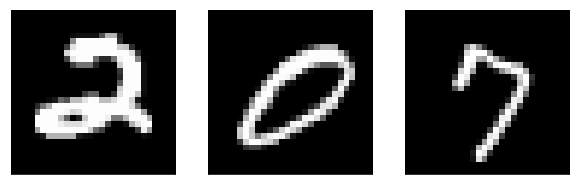

In [10]:
print("Training Data:")
plotSamples(data)
print("Submission Data:")
plotSamples(data_sub)

In [11]:
data_target=data['label']
def plotSampleCounts():    
    ex=data_target.value_counts().index
    why=data_target.value_counts().values
    plt.figure(figsize=(7,5))
    plt.title("Value Counts")
    plt.bar(ex,why)
    plt.ylim(3500,5000)
    plt.xlabel("Digits")
    plt.ylabel("No. of Samples")
    for x,y in zip(ex,why):
        plt.text(x-0.4,y+15,y)
    plt.xticks(ex)
    plt.show()

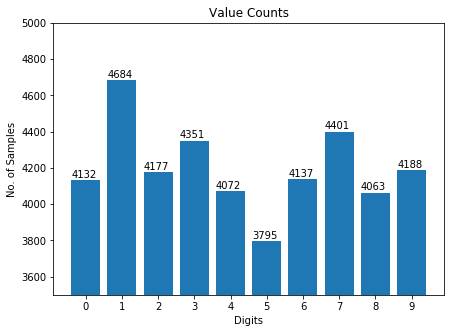

In [12]:
plotSampleCounts()

In [77]:
data_target=data['label']

In [78]:
data_noLabel=data.iloc[:,1:]

In [79]:
dataNorm=(data_noLabel.values/255.0)

In [80]:
data_reshaped=dataNorm.reshape(-1,28,28,1)

In [81]:
data_reshaped.shape

(42000, 28, 28, 1)

In [82]:
(data_reshaped[0]).shape

(28, 28, 1)

In [83]:
data_target_vals=pd.get_dummies(data_target).values

In [84]:
data_target_vals

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [85]:
X=data_reshaped
y=data_target_vals

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=23, test_size=0.1)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(37800, 28, 28, 1) (4200, 28, 28, 1) (37800, 10) (4200, 10)


In [24]:
X_train[:][:][:].shape

(37800, 28, 28, 1)

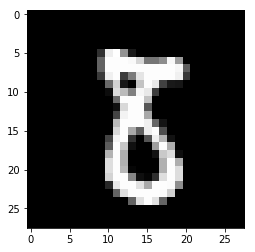

In [25]:
plt.imshow(X_test[0][:,:,0],cmap='gray')

In [26]:
def plotPerformance(model):
    eval_params=model.history.history
    print(eval_params)
    LossAccPlot=plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.plot(eval_params['loss'],label='Loss')
    plt.plot(eval_params['val_loss'],'--',label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(eval_params['acc'],label='Accuracy')
    plt.plot(eval_params['val_acc'],'--',label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    plt.close()

## CNN

In [31]:
def compareModels(epochs):
    for epoch in epochs:
        model= Sequential()

        model.add(Conv2D(64,(3,3), input_shape=X.shape[1:]))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2)))

        model.add(Conv2D(128,(3,3)))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2)))

        model.add(Flatten())
        model.add(Dense(64))

        model.add(Dense(10))
        model.add(Activation('sigmoid'))
        print("=================================================================\nModel with", epoch,"epochs:")
        model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
        model.fit(X_train,y_train,batch_size=10, validation_split=0.1, epochs=epoch)
        plotPerformance(model)
        predicted=np.argmax(model.predict(X_test), axis=1)
        real=np.argmax(y_test,axis=1)
        missclass=0
        total=real.shape[0]
        for r,p in zip(real,predicted):
            if r-p!=0:
                missclass=missclass+1
        print("Accuracy on Test Data:", (total-missclass)/total,'\n=================================================================')

Model with 2 epochs:
Train on 34020 samples, validate on 3780 samples
Epoch 1/2
34020/34020 [==============================] - 10s 308us/sample - loss: 0.4598 - acc: 0.8627 - val_loss: 0.1721 - val_acc: 0.9455
Epoch 2/2
34020/34020 [==============================] - 10s 299us/sample - loss: 0.1151 - acc: 0.9654 - val_loss: 0.1015 - val_acc: 0.9669
{'loss': [0.4597675690689819, 0.11509250955513338], 'acc': [0.86269844, 0.9654027], 'val_loss': [0.1721240474920099, 0.10152419592301908], 'val_acc': [0.94550264, 0.9669312]}


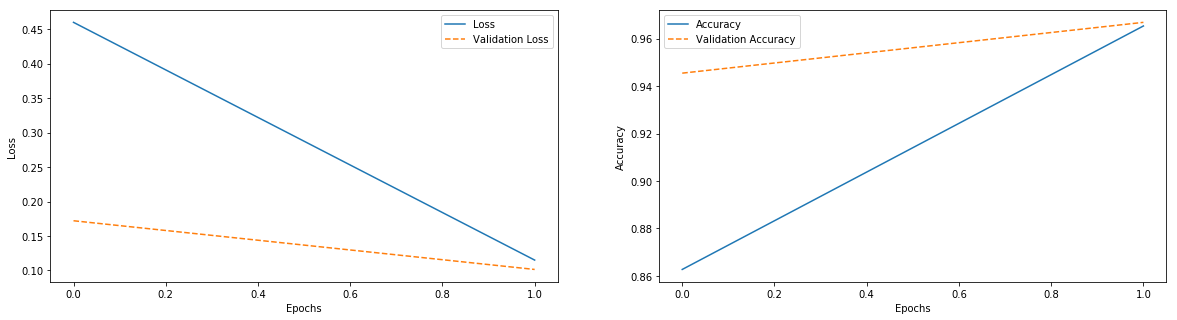

Accuracy on Test Data: 0.969047619047619 
Model with 5 epochs:
Train on 34020 samples, validate on 3780 samples
Epoch 1/5
34020/34020 [==============================] - 10s 303us/sample - loss: 0.4322 - acc: 0.8650 - val_loss: 0.1483 - val_acc: 0.9537
Epoch 2/5
34020/34020 [==============================] - 10s 302us/sample - loss: 0.1157 - acc: 0.9647 - val_loss: 0.0851 - val_acc: 0.9743
Epoch 3/5
34020/34020 [==============================] - 10s 299us/sample - loss: 0.0854 - acc: 0.9731 - val_loss: 0.0826 - val_acc: 0.9749
Epoch 4/5
34020/34020 [==============================] - 10s 298us/sample - loss: 0.0703 - acc: 0.9794 - val_loss: 0.0796 - val_acc: 0.9741
Epoch 5/5
34020/34020 [==============================] - 10s 298us/sample - loss: 0.0590 - acc: 0.9814 - val_loss: 0.0639 - val_acc: 0.9762
{'loss': [0.4322073351331619, 0.11565108991071729, 0.0853792746561866, 0.07033861834821033, 0.05899926944986423], 'acc': [0.86504996, 0.96466786, 0.9730747, 0.97936505, 0.9813639], 'val_lo

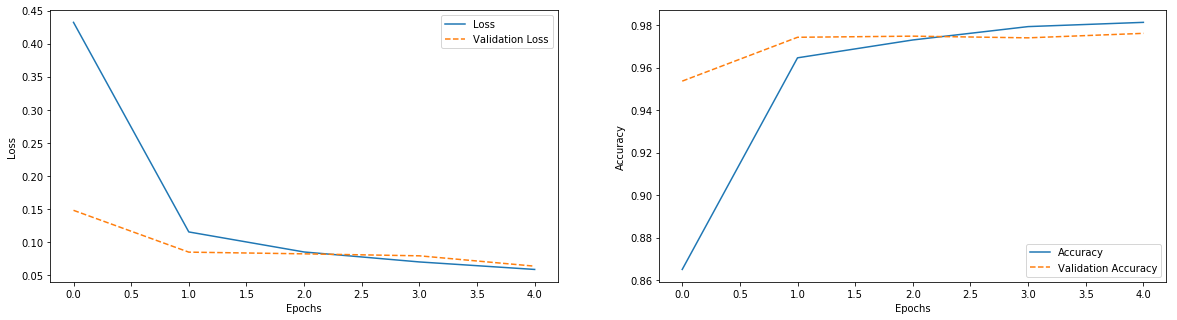

Accuracy on Test Data: 0.9807142857142858 
Model with 7 epochs:
Train on 34020 samples, validate on 3780 samples
Epoch 1/7
34020/34020 [==============================] - 11s 319us/sample - loss: 0.4360 - acc: 0.8650 - val_loss: 0.1320 - val_acc: 0.9587
Epoch 2/7
34020/34020 [==============================] - 10s 305us/sample - loss: 0.1125 - acc: 0.9644 - val_loss: 0.0874 - val_acc: 0.9738
Epoch 3/7
34020/34020 [==============================] - 10s 303us/sample - loss: 0.0823 - acc: 0.9744 - val_loss: 0.0769 - val_acc: 0.9762
Epoch 4/7
34020/34020 [==============================] - 10s 304us/sample - loss: 0.0680 - acc: 0.9789 - val_loss: 0.0708 - val_acc: 0.9778
Epoch 5/7
34020/34020 [==============================] - 10s 308us/sample - loss: 0.0566 - acc: 0.9826 - val_loss: 0.0645 - val_acc: 0.9802
Epoch 6/7
34020/34020 [==============================] - 10s 306us/sample - loss: 0.0507 - acc: 0.9839 - val_loss: 0.0607 - val_acc: 0.9807
Epoch 7/7
34020/34020 [========================

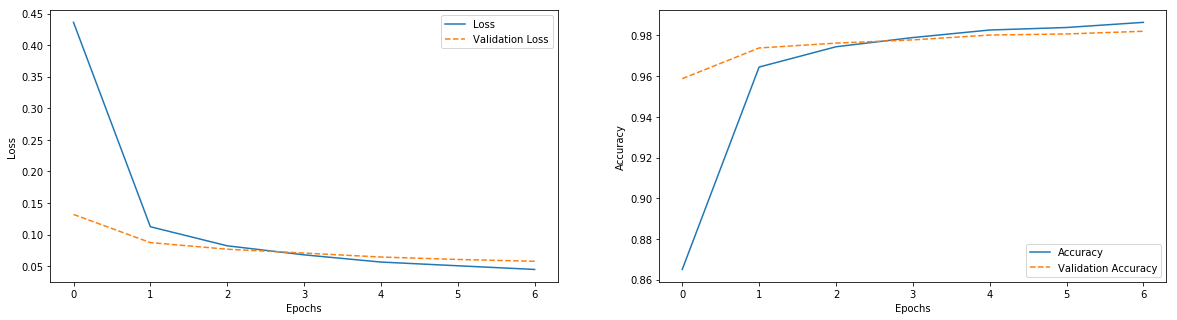

Accuracy on Test Data: 0.9835714285714285 
Model with 10 epochs:
Train on 34020 samples, validate on 3780 samples
Epoch 1/10
34020/34020 [==============================] - 11s 311us/sample - loss: 0.4472 - acc: 0.8646 - val_loss: 0.2304 - val_acc: 0.9317
Epoch 2/10
34020/34020 [==============================] - 10s 306us/sample - loss: 0.1145 - acc: 0.9648 - val_loss: 0.1097 - val_acc: 0.9640
Epoch 3/10
34020/34020 [==============================] - 11s 315us/sample - loss: 0.0839 - acc: 0.9738 - val_loss: 0.0882 - val_acc: 0.9717
Epoch 4/10
34020/34020 [==============================] - 10s 303us/sample - loss: 0.0682 - acc: 0.9784 - val_loss: 0.0737 - val_acc: 0.9786
Epoch 5/10
34020/34020 [==============================] - 10s 304us/sample - loss: 0.0598 - acc: 0.9818 - val_loss: 0.0796 - val_acc: 0.9743
Epoch 6/10
34020/34020 [==============================] - 10s 304us/sample - loss: 0.0512 - acc: 0.9844 - val_loss: 0.0628 - val_acc: 0.9810
Epoch 7/10
34020/34020 [================

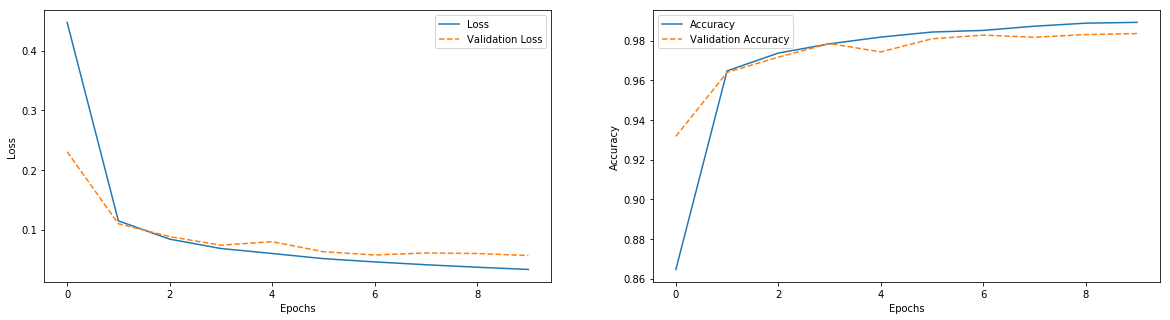

Accuracy on Test Data: 0.9833333333333333 


In [33]:
compareModels([2,5,7,10])

Train on 34020 samples, validate on 3780 samples
Epoch 1/10
34020/34020 [==============================] - 11s 331us/sample - loss: 0.4373 - acc: 0.8646 - val_loss: 0.1479 - val_acc: 0.9542
Epoch 2/10
34020/34020 [==============================] - 11s 319us/sample - loss: 0.1167 - acc: 0.9640 - val_loss: 0.1258 - val_acc: 0.9608
Epoch 3/10
34020/34020 [==============================] - 11s 319us/sample - loss: 0.0868 - acc: 0.9738 - val_loss: 0.0736 - val_acc: 0.9783
Epoch 4/10
34020/34020 [==============================] - 11s 321us/sample - loss: 0.0722 - acc: 0.9783 - val_loss: 0.0998 - val_acc: 0.9720
Epoch 5/10
34020/34020 [==============================] - 11s 313us/sample - loss: 0.0610 - acc: 0.9813 - val_loss: 0.0742 - val_acc: 0.9802
Epoch 6/10
34020/34020 [==============================] - 11s 313us/sample - loss: 0.0542 - acc: 0.9833 - val_loss: 0.0678 - val_acc: 0.9796
Epoch 7/10
34020/34020 [==============================] - 11s 312us/sample - loss: 0.0472 - acc: 0.9853 -

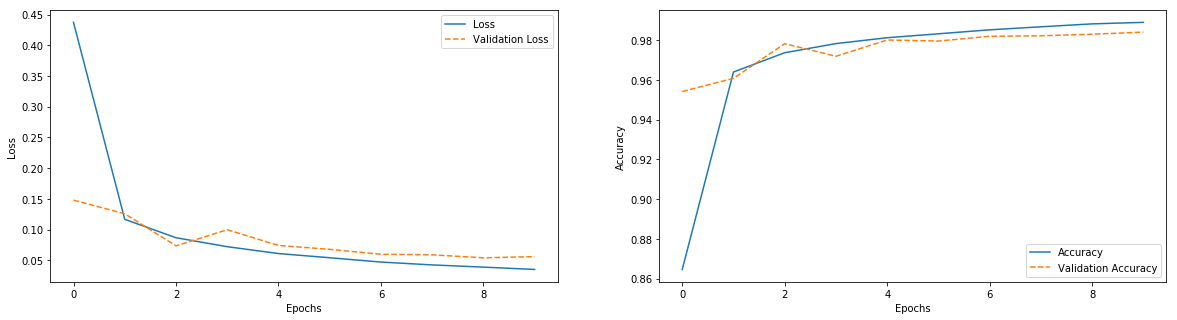

Accuracy on Test Data: 0.9842857142857143 


<Figure size 432x288 with 0 Axes>

In [42]:
model= Sequential()

model.add(Conv2D(64,(3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=10, validation_split=0.1, epochs=10)
plotPerformance(model)


predicted=np.argmax(model.predict(X_test), axis=1)
real=np.argmax(y_test,axis=1)
missclass=0
total=real.shape[0]
missclassified_indices=[]
ind=0
for r,p in zip(real,predicted):
    if r-p!=0:
        missclass=missclass+1
        missclassified_indices.append(ind)
    ind=ind+1


print("Accuracy on Test Data:", (total-missclass)/total,'\n=================================================================')

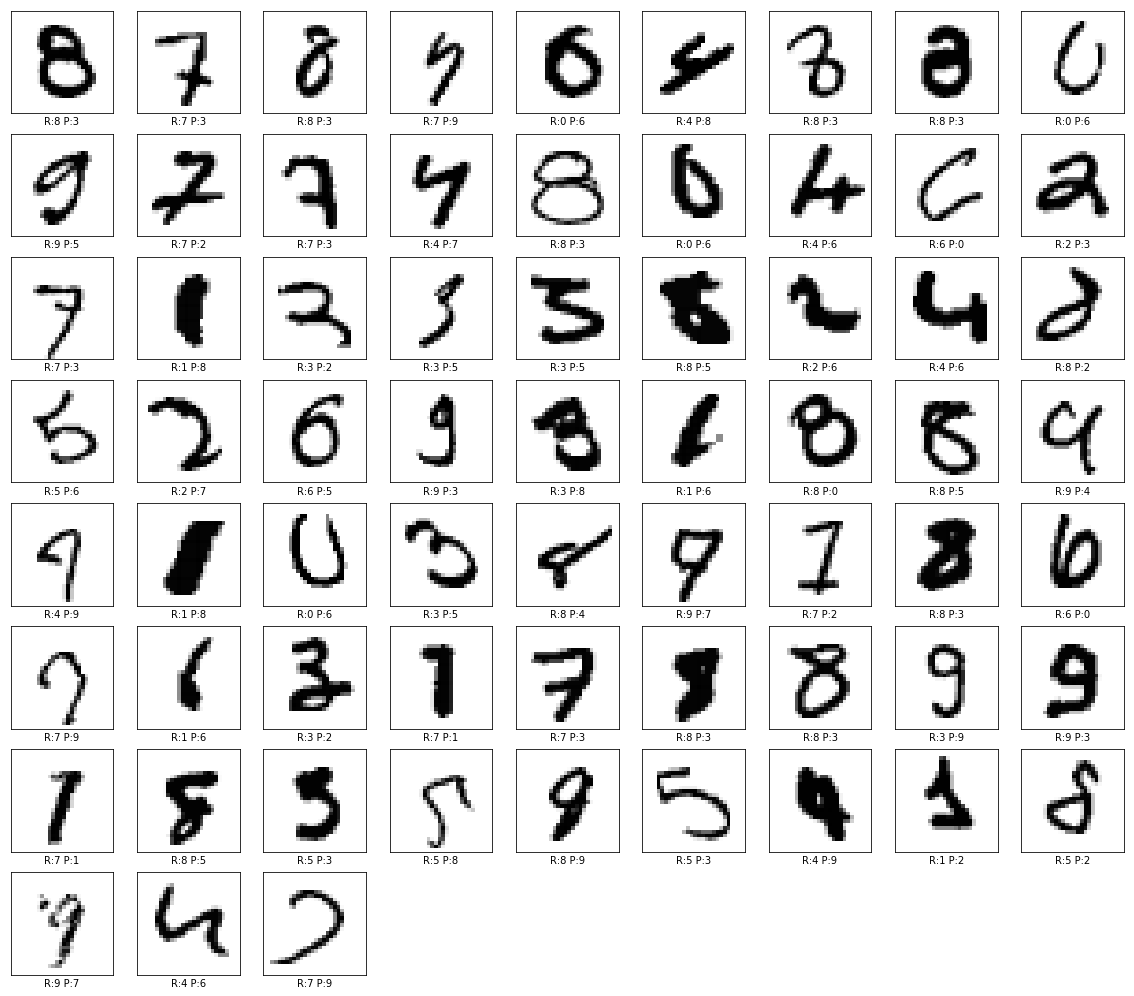

In [165]:
length= len(missclassified_indices)
i=0
while length>=i*i:
    i=i+1
plt.figure(figsize=(20,20))
plt.title("Missclassifications")
for j,ms in zip(range(0,66),missclassified_indices):
    plt.subplot(i,i,j+1)
    plt.imshow(-X_test[ms][:,:,0],cmap='gray')
    plt.xlabel("R:"+str(real[ms])+" P:"+str(predicted[ms]))
    plt.xticks(())
    plt.yticks(())
plt.show()

Prediction: 7
Confidence: 52.77778506278992 %


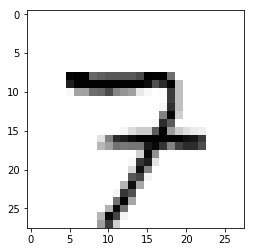

In [164]:
print("Prediction:",np.argmax(model.predict(X_test[6].reshape(-1,28,28,1))))
print("Confidence:",np.max(model.predict(X_test[6].reshape(-1,28,28,1)))*100,"%")
plt.imshow(-X_test[6][:,:,0], cmap='gray')
plt.show()

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 13s 345us/sample - loss: 0.4168 - acc: 0.8725 - val_loss: 0.1327 - val_acc: 0.9588
Epoch 2/10
37800/37800 [==============================] - 13s 339us/sample - loss: 0.1067 - acc: 0.9674 - val_loss: 0.0991 - val_acc: 0.9667
Epoch 3/10
37800/37800 [==============================] - 13s 336us/sample - loss: 0.0795 - acc: 0.9760 - val_loss: 0.0725 - val_acc: 0.9757
Epoch 4/10
37800/37800 [==============================] - 13s 340us/sample - loss: 0.0651 - acc: 0.9795 - val_loss: 0.0642 - val_acc: 0.9793
Epoch 5/10
37800/37800 [==============================] - 13s 344us/sample - loss: 0.0550 - acc: 0.9835 - val_loss: 0.0552 - val_acc: 0.9836
Epoch 6/10
37800/37800 [==============================] - 13s 336us/sample - loss: 0.0479 - acc: 0.9854 - val_loss: 0.0528 - val_acc: 0.9824
Epoch 7/10
37800/37800 [==============================] - 13s 337us/sample - loss: 0.0430 - acc: 0.9873 -

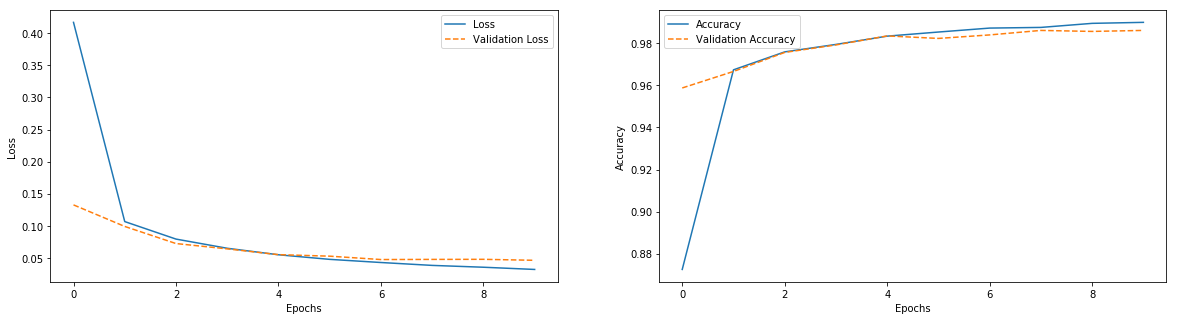

In [167]:
model= Sequential()

model.add(Conv2D(64,(3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X,y,batch_size=10, validation_split=0.1, epochs=10)
plotPerformance(model)


In [171]:
model.weights

[<tf.Variable 'conv2d_20/kernel:0' shape=(3, 3, 1, 64) dtype=float32>,
 <tf.Variable 'conv2d_20/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2d_21/kernel:0' shape=(3, 3, 64, 128) dtype=float32>,
 <tf.Variable 'conv2d_21/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_20/kernel:0' shape=(3200, 64) dtype=float32>,
 <tf.Variable 'dense_20/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'dense_21/kernel:0' shape=(64, 10) dtype=float32>,
 <tf.Variable 'dense_21/bias:0' shape=(10,) dtype=float32>]

In [172]:
model.save("./ModelEXP/digiNet.model")

In [6]:
from tensorflow.keras.models import load_model

In [7]:
model=load_model("./ModelEXP/digiNet.model")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
activation_30 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
activation_31 (Activation)   (None, 11, 11, 128)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3200)              0         
__________

In [12]:
model.predict(X_test[0])

<bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000214CBB44E80>>

In [29]:
model.predict(data.iloc[4,1:].values.reshape(-1,28,28,1)/255)

array([[9.8031271e-01, 0.0000000e+00, 2.9802322e-08, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.0861626e-07, 0.0000000e+00,
        2.3826320e-08, 8.1247782e-09]], dtype=float32)

In [31]:
model.save_weights("./ModelEXP/weights")


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


In [32]:
model.save("./model.model")

In [68]:
x=(data.iloc[0,1:].values)

In [95]:
X[X>=0.1]=1.0

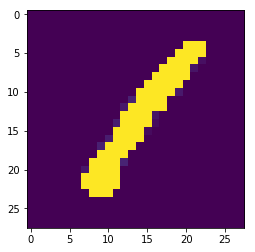

In [96]:
plt.imshow((X[0].reshape(28,28)))

In [97]:
model.fit(X,y,batch_size=10, validation_split=0.1, epochs=10)
plotPerformance(model)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 13s 337us/sample - loss: 0.0495 - acc: 0.9837 - val_loss: 0.0631 - val_acc: 0.9805
Epoch 2/10
37800/37800 [==============================] - 12s 320us/sample - loss: 0.0396 - acc: 0.9869 - val_loss: 0.0562 - val_acc: 0.9840
Epoch 3/10
37800/37800 [==============================] - 12s 319us/sample - loss: 0.0346 - acc: 0.9890 - val_loss: 0.0553 - val_acc: 0.9821
Epoch 4/10
37800/37800 [==============================] - 12s 316us/sample - loss: 0.0306 - acc: 0.9904 - val_loss: 0.0463 - val_acc: 0.9860
Epoch 5/10
37800/37800 [==============================] - 12s 317us/sample - loss: 0.0272 - acc: 0.9914 - val_loss: 0.0518 - val_acc: 0.9864
Epoch 6/10
37800/37800 [==============================] - 12s 317us/sample - loss: 0.0249 - acc: 0.9926 - val_loss: 0.0510 - val_acc: 0.9845
Epoch 7/10
37800/37800 [==============================] - 12s 318us/sample - loss: 0.0226 - acc: 0.9926 -

NameError: name 'plotPerformance' is not defined

In [98]:
model.save("./model.model")